In [1]:
# ! pip install ~/ogip
from matplotlib import pylab as plt
from astropy.io import fits
import ogip

In [2]:
# oda:version "v1.8"

In [3]:
import ogip.core
spi_rmf = ogip.core.open_something("spi/rmf_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")
spi_pha = ogip.core.open_something("spi/spectrum_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")


jmx1_pha = ogip.core.open_something("JMX1_spectrum_GRB221009A.fits")
jmx1_rmf = ogip.core.open_something("JMX1_rmf_GRB221009A.fits")
jmx1_arf = ogip.core.open_something("JMX1_arf_GRB221009A.fits")

jmx2_pha = ogip.core.open_something("JMX2_spectrum_GRB221009A.fits")
jmx2_rmf = ogip.core.open_something("JMX2_rmf_GRB221009A.fits")
jmx2_arf = ogip.core.open_something("JMX2_arf_GRB221009A.fits")


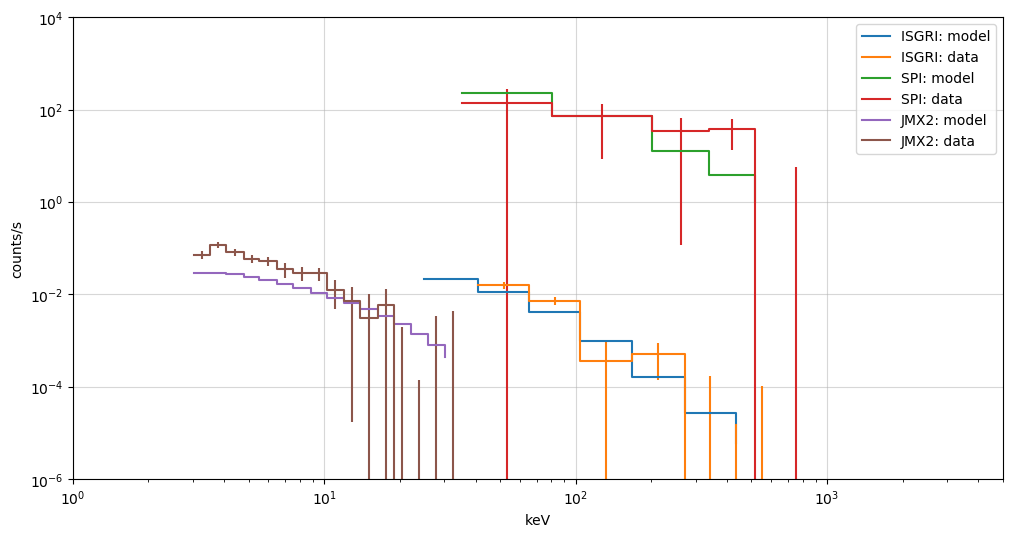

In [4]:
from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec


isgri_pha = PHAI.from_file_name("IBIS_spectrum_GRB221009A.fits")
isgri_rmf = RMF.from_file_name("IBIS_rmf_GRB221009A.fits")

isgri_pha_rebinned, isgri_rmf_rebinned = rebin(isgri_pha, isgri_rmf, log_bins(5, 25, 700))

spi_pha_rebinned, spi_rmf_rebinned = rebin(spi_pha, spi_rmf, log_bins(3, 25, 1000))
# spi_pha_rebinned, spi_rmf_rebinned = rebin(spi_pha, spi_rmf, log_bins(5, 25, 600))

f = plt.figure(figsize=(12, 6))

model = lambda x:(3e-5*(x/25.)**-1.7)

plot_spec(isgri_pha_rebinned, model, isgri_rmf_rebinned, fig=f, label_prefix="ISGRI")
plot_spec(spi_pha_rebinned, model, spi_rmf_rebinned, fig=f, label_prefix="SPI")
# plot_spec(jmx1_pha, model, jmx1_rmf, arf=jmx1_arf, fig=f, label_prefix="JMX2")
plot_spec(jmx2_pha, model, jmx2_rmf, arf=jmx2_arf, fig=f, label_prefix="JMX2")


plt.ylabel("counts/s")
plt.xlabel("keV")

plt.xlim([1, 5e3])
plt.ylim([1e-6, 1e4])
# plt.loglog()

plt.grid(alpha=0.5)

plt.savefig("spec_afterglow.pdf")

# TODO: add in grey other data

In [5]:
import numpy as np

In [6]:
sn_max = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn_total = 0 # np.sum(d['RATE']) / np.sum(d['STAT_ERR']**2)**0.5
exposure = 0 # spec[2].header['EXPOSURE']
ag_spec="spec_afterglow.pdf"